In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Loading the .mat file
from scipy.io import loadmat
data = loadmat("Indian_pines_corrected.mat")               
print(data.keys())                            #cheking what variables are inside the file 
                                              #the actual hyperspectral cube is stored in "indian_pines_corrected"

dict_keys(['__header__', '__version__', '__globals__', 'indian_pines_corrected'])


In [3]:
#Extracting the hyperspectral cube
cube = data['indian_pines_corrected']
print(cube.shape)

(145, 145, 200)


In [2]:
def histogram_equalization(image):

    # Converting to float
    image = image.astype(np.float32)

    # Normalize image to 0-255 range for HE
    img_norm = (image - image.min()) / (image.max() - image.min() + 1e-12)
    img_int = (img_norm*255).astype(np.uint8) # Converts the normalized image (0–1) into 0–255 integers (uint8).

    hist = np.zeros(256)  # creates an array of 256 zeros to hold the histogram counts
    for value in img_int.flatten():  #img_int.flatten() -> converts the 2D image into a 1D list of pixel values
        hist[value] += 1 # building up the histogram

    # total pixels
    n = img_int.size

    # Computing pdf p(r_k) = n_k/n
    pdf = hist/n

    # Computing cdf
    cdf = np.cumsum(pdf) #computes the cumulative sum

    # applying transformation s_k = (L-1)*c(r_k)
    s_k = np.round(cdf * 255).astype(np.uint8) # L = 256

    # map each pixel using s_k
    equalized = s_k[img_int]

    # normalizing the output pixel values
    equalized_norm = equalized.astype(np.float32) / 255.0

    return equalized_norm


Applying to a single band

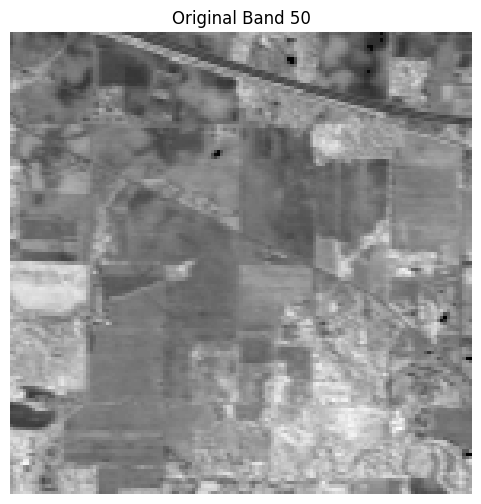

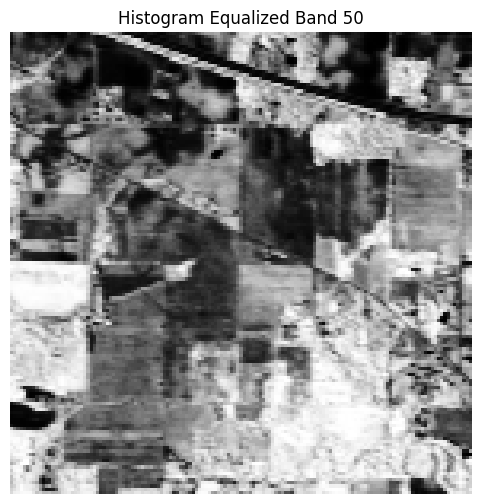

In [7]:
band_50 = cube[:, :, 50]
he_band_50 = histogram_equalization(band_50)

plt.figure(figsize=(6,6))
plt.title("Original Band 50")
plt.imshow(band_50, cmap='gray')
plt.axis('off')

plt.figure(figsize=(6,6))
plt.title("Histogram Equalized Band 50")
plt.imshow(he_band_50, cmap='gray')
plt.axis('off')

plt.show()

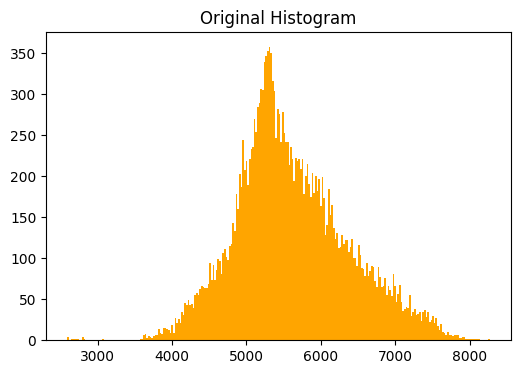

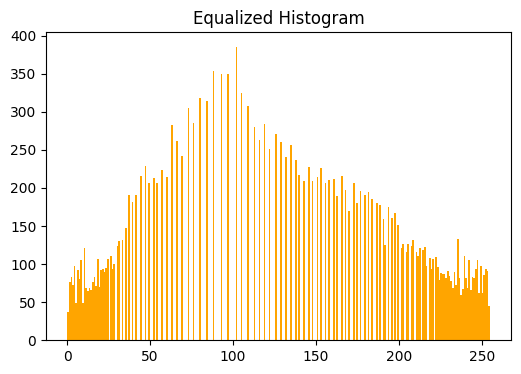

In [8]:
plt.figure(figsize=(6,4))
plt.title("Original Histogram")
plt.hist(band_50.flatten(), bins=256, color='orange')

plt.figure(figsize=(6,4))
plt.title("Equalized Histogram")
plt.hist((he_band_50 * 255).flatten(), bins=256, color='orange')

plt.show()

Applying historgram equalization to average of all bands

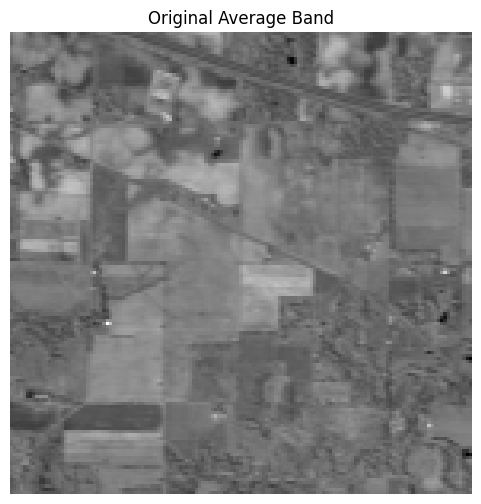

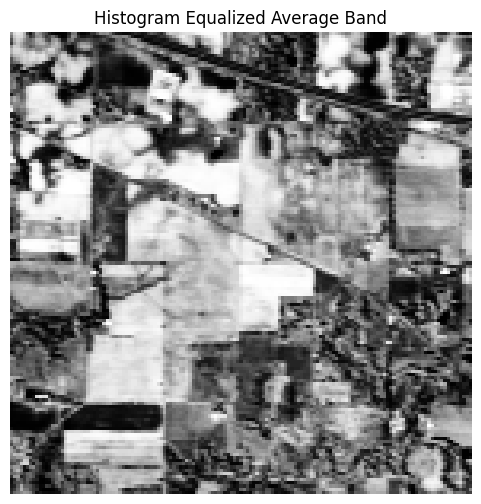

In [10]:
avg_image = np.mean(cube, axis=2)
he_avg = histogram_equalization(avg_image)

plt.figure(figsize=(6,6))
plt.title("Original Average Band")
plt.imshow(avg_image, cmap='gray')
plt.axis('off')

plt.figure(figsize=(6,6))
plt.title("Histogram Equalized Average Band")
plt.imshow(he_avg, cmap='gray')
plt.axis('off')

plt.show()

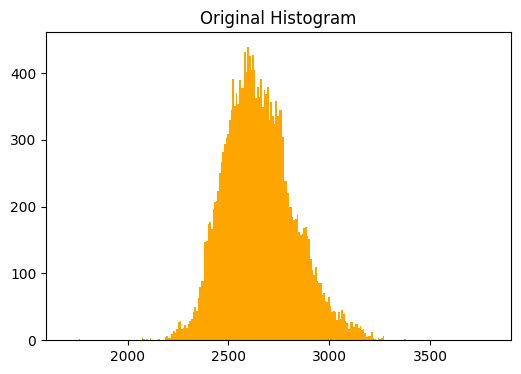

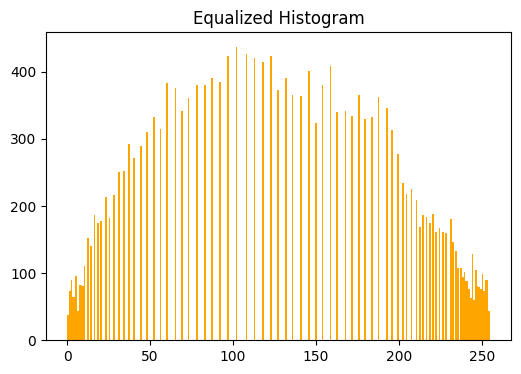

In [11]:
plt.figure(figsize=(6,4))
plt.title("Original Histogram")
plt.hist(avg_image.flatten(), bins=256, color='orange')

plt.figure(figsize=(6,4))
plt.title("Equalized Histogram")
plt.hist((he_avg * 255).flatten(), bins=256, color='orange')

plt.show()